In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar los datos
df = pd.read_csv('ticket.csv')

# 2. Preprocesamiento
# Codificar las ciudades
le_city_ini = LabelEncoder()
le_city_end = LabelEncoder()

df['TICKET_CITYINI_ENCODED'] = le_city_ini.fit_transform(df['CITY_NAME_INI'])
df['TICKET_CITYEND_ENCODED'] = le_city_end.fit_transform(df['CITY_NAME_END'])

# Verificar datos preprocesados
print(df.head())


   ID_TICKET  TICKET_CITYINI   CITY_NAME_INI CITY_NAME_END  TICKET_CITYEND  \
0    1430636             960        Acambaro        Laredo             100   
1    1431683              16  Apaseo el Alto   Dallas I-30             534   
2    1431463              16  Apaseo el Alto   Dallas I-30             534   
3    1431080              16  Apaseo el Alto   Dallas I-30             534   
4    1431451              16  Apaseo el Alto   Dallas I-30             534   

   TICKET_CITYINI_ENCODED  TICKET_CITYEND_ENCODED  
0                       0                      17  
1                       1                      10  
2                       1                      10  
3                       1                      10  
4                       1                      10  


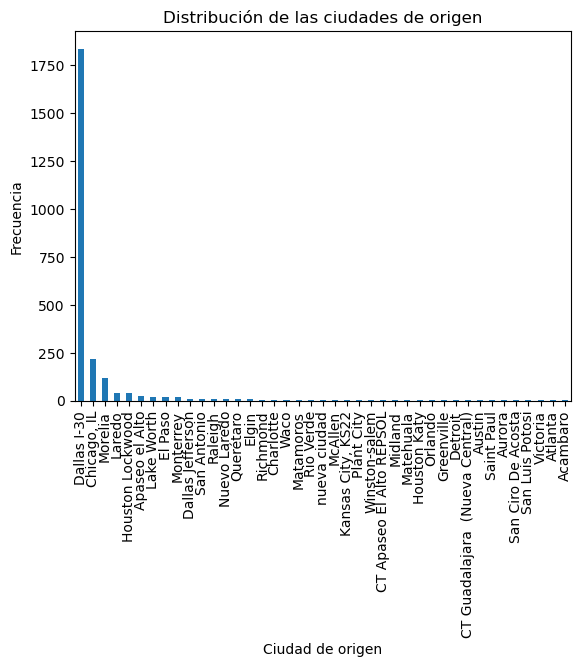

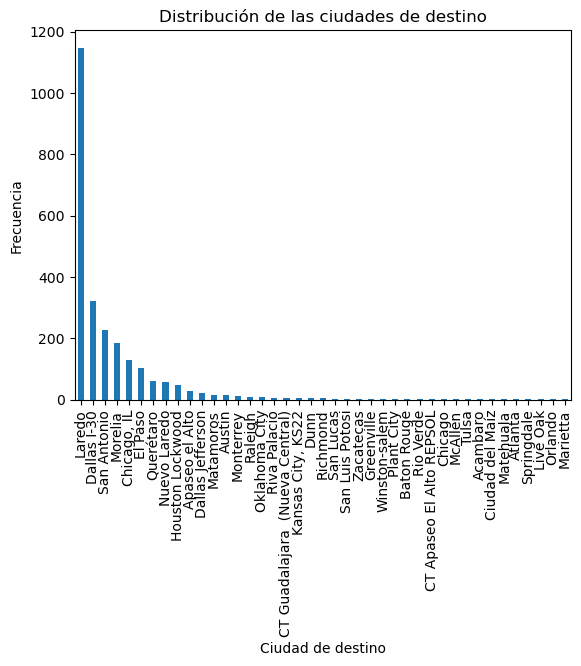

In [19]:

# 3. Análisis exploratorio de datos
# Distribución de las ciudades de origen
df['CITY_NAME_INI'].value_counts().plot(kind='bar')
plt.title('Distribución de las ciudades de origen')
plt.xlabel('Ciudad de origen')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las ciudades de destino
df['CITY_NAME_END'].value_counts().plot(kind='bar')
plt.title('Distribución de las ciudades de destino')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.show()


[[  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  14   0   0   0   0   0   0   0  23   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  12  86   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0  

c:\Users\Miguel Bustillos\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel Bustillos\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Miguel Bustillos\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


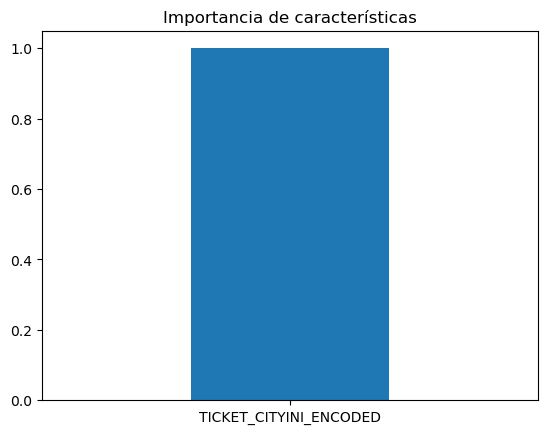

In [20]:

# 4. Modelo de aprendizaje automático
# Definir características y etiqueta
X = df[['TICKET_CITYINI_ENCODED']]
y = df['TICKET_CITYEND_ENCODED']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Importancia de características
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importancia de características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


In [22]:

# Predecir las probabilidades de destino dado una ciudad de origen
def predict_destinations(city_name_ini, top_n=5):
    city_ini_encoded = le_city_ini.transform([city_name_ini])[0]
    probabilities = clf.predict_proba([[city_ini_encoded]])[0]
    top_indices = probabilities.argsort()[-top_n:][::-1]
    top_cities = le_city_end.inverse_transform(top_indices)
    top_probabilities = probabilities[top_indices]
    for city, prob in zip(top_cities, top_probabilities):
        print(f'City: {city}, Probability: {prob:.2f}')

# Ejemplo de uso
city_name_ini = 'Chicago, IL'
predict_destinations(city_name_ini)


City: Ciudad del Maíz, Probability: 0.90
City: Matehuala, Probability: 0.09
City: Oklahoma City, Probability: 0.01
City: Laredo, Probability: 0.00
City: Houston Lockwood, Probability: 0.00


c:\Users\Miguel Bustillos\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
